In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
_inv = pd.read_excel('data/Sales_Inventory_history.xlsx',sheetname='inventory data').T
_sales = pd.read_excel('data/Sales_Inventory_history.xlsx',sheetname='sales record').T

In [3]:
inv = _inv.rename(columns=_inv.iloc[0])[1:]
# change dtype to numeric
inv[inv.columns] = inv[inv.columns].apply(pd.to_numeric)
sales = _sales.rename(columns=_sales.iloc[0])[1:].fillna(0)

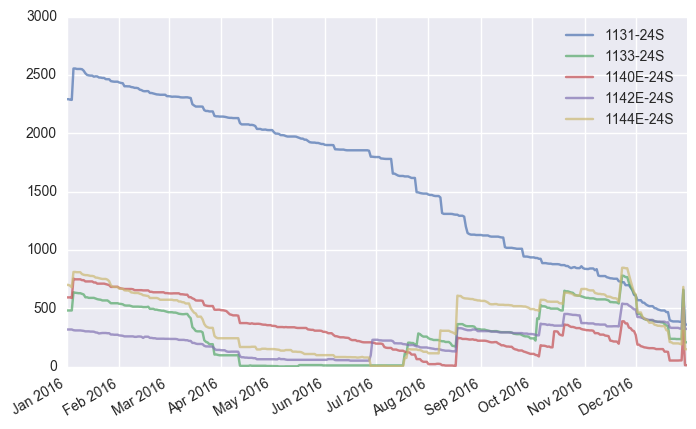

In [4]:
inv.plot(figsize=(8,5),alpha=0.7)

In [5]:
inv.describe()

,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1589.139344,301.054645,330.210383,236.937158,395.445355
std,654.492362,225.923753,207.217263,123.248224,244.988970
min,360.000000,1.000000,6.000000,51.000000,3.000000
25%,936.000000,13.000000,172.000000,136.000000,147.000000
50%,1796.000000,301.500000,296.000000,255.000000,464.000000
75%,2143.000000,510.000000,483.000000,319.500000,591.750000
max,2555.000000,780.000000,754.000000,540.000000,847.000000


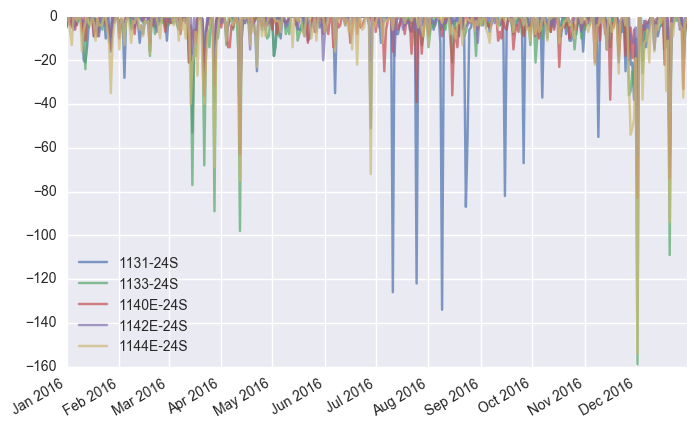

In [6]:
sales.plot(figsize=(8,5),alpha=0.7)

In [7]:
sales.describe()

,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,-6.286885,-5.095628,-4.409836,-2.418033,-5.732240
std,15.808345,14.033000,8.968212,5.574659,13.550692
min,-134.000000,-159.000000,-83.000000,-64.000000,-154.000000
25%,-5.000000,-5.000000,-5.000000,-3.000000,-6.000000
50%,-2.000000,0.000000,-2.000000,0.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000


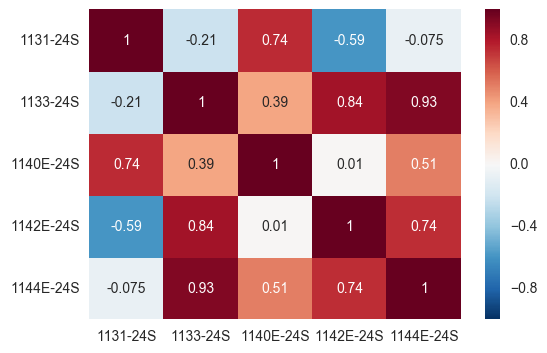

In [8]:
sns.heatmap(inv.corr(),annot=True)

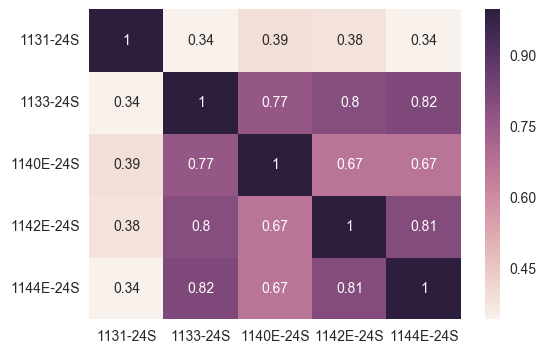

In [9]:
sns.heatmap(sales.corr(),annot=True)

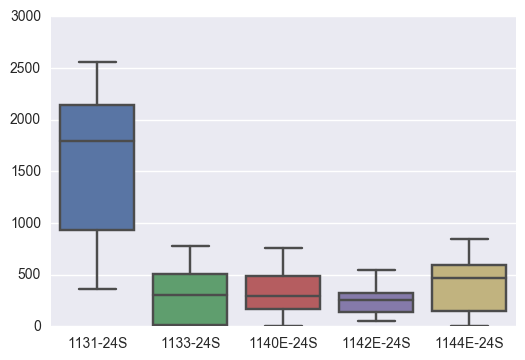

In [10]:
sns.boxplot(data=inv)

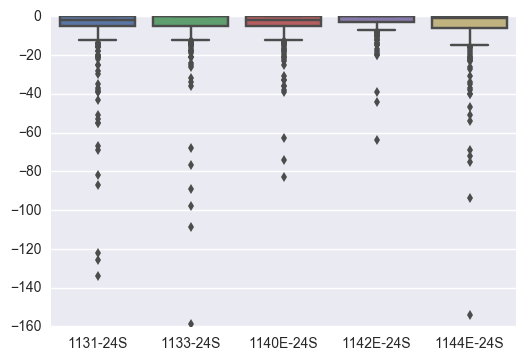

In [11]:
sns.boxplot(data=sales)

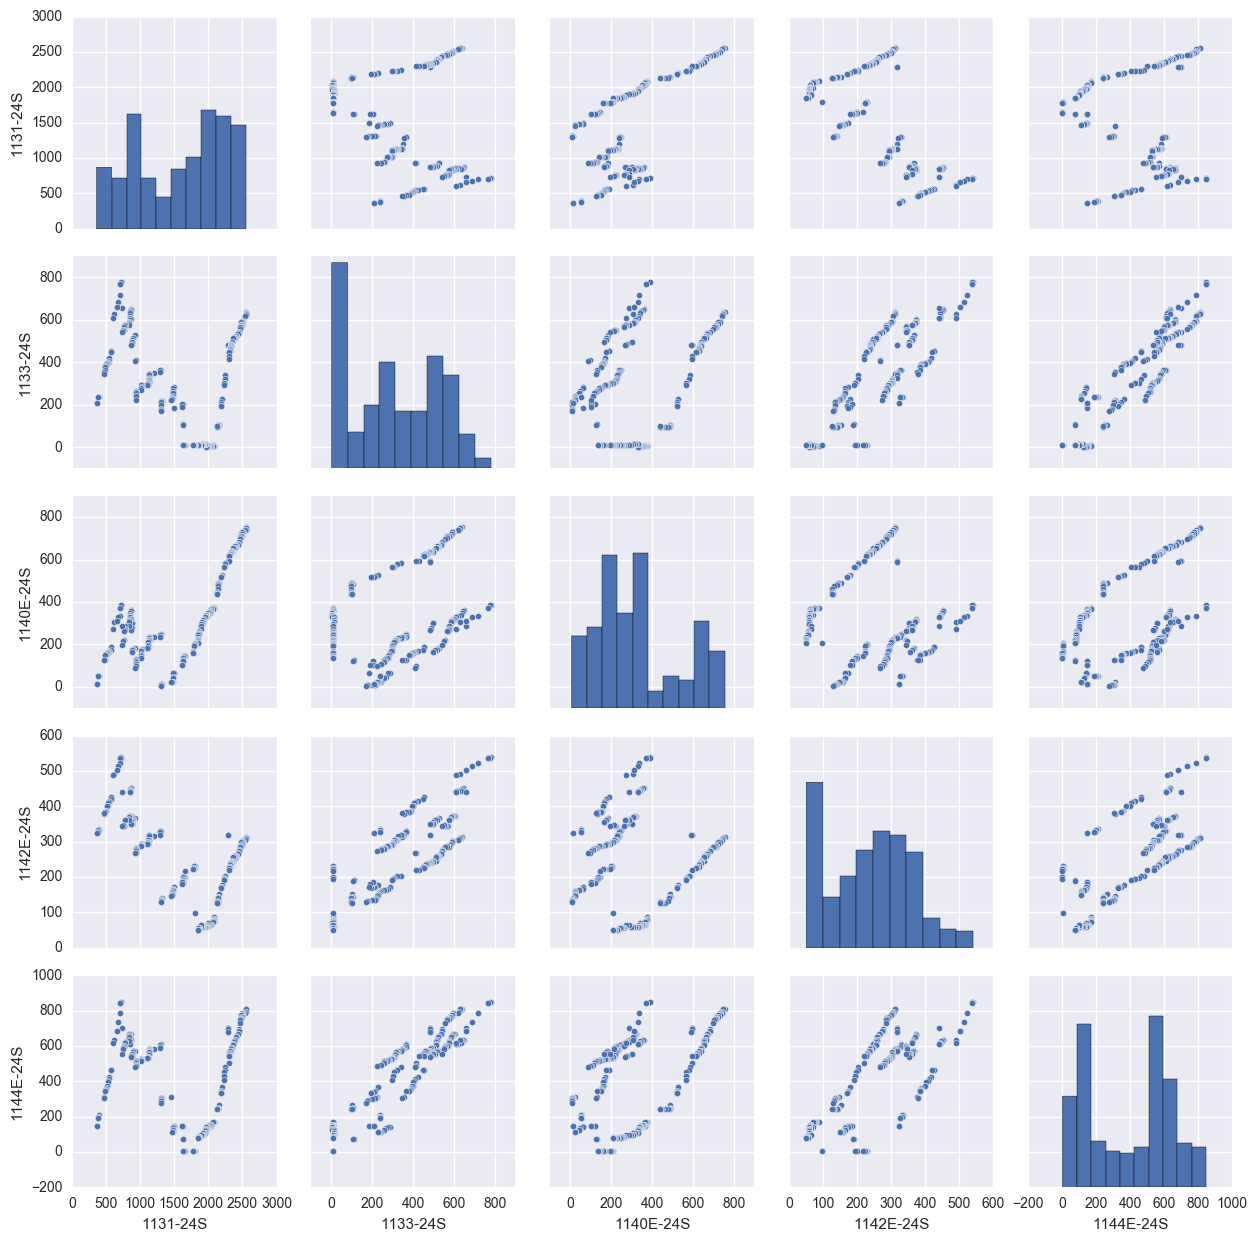

In [12]:
sns.pairplot(inv)

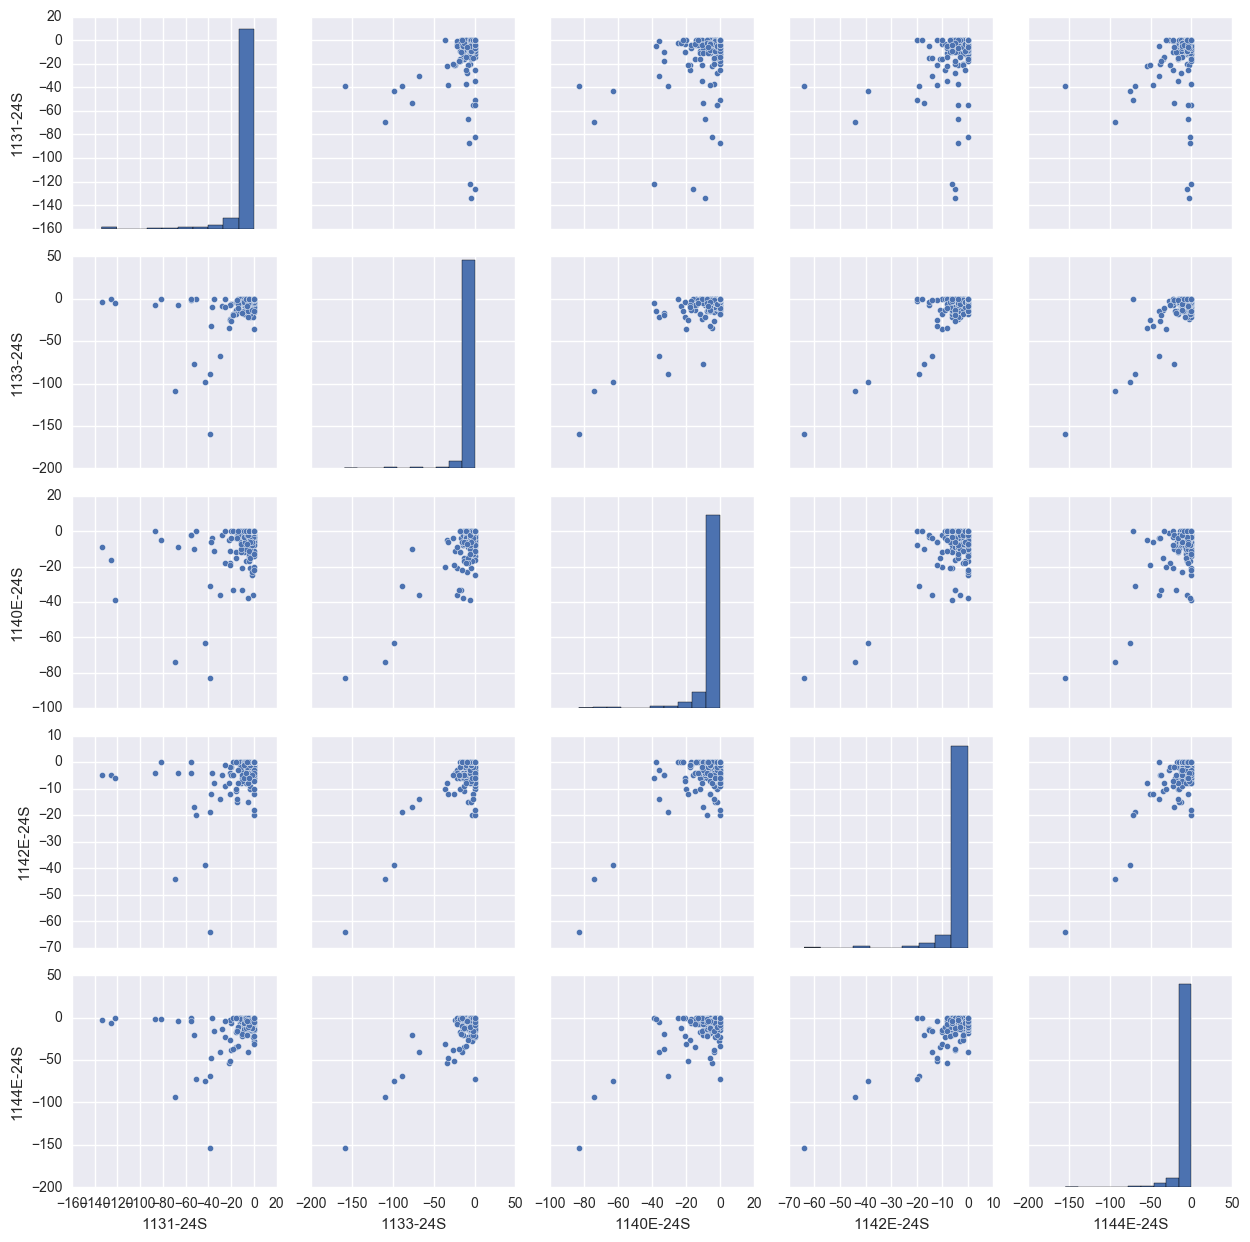

In [13]:
sns.pairplot(sales)

In [14]:
sales.reset_index(level=0,inplace=True)
timeStamp = sales['index']

#timeStamp = timeStamp.apply(pd.to_datetime)
#sales['Hour'] = timeStamp.apply(lambda x: x.hour)
sales['Month'] = timeStamp.apply(lambda x: x.month)
sales['Day of Week'] = timeStamp.apply(lambda x: x.weekday())
# df['Day of Week'] = s.apply(lambda x: x.dayofweek)

#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#sales['Day of Week'] = sales['Day of Week'].map(dmap)

sales.head()

,index,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S,Month,Day of Week
0,2016-01-01,-4.0,0.0,-5.0,-4.0,0.0,1,4
1,2016-01-02,0.0,0.0,0.0,0.0,0.0,1,5
2,2016-01-03,-4.0,0.0,0.0,0.0,-7.0,1,6
3,2016-01-04,-2.0,0.0,-5.0,0.0,-13.0,1,0
4,2016-01-05,-1.0,-4.0,0.0,-6.0,0.0,1,1


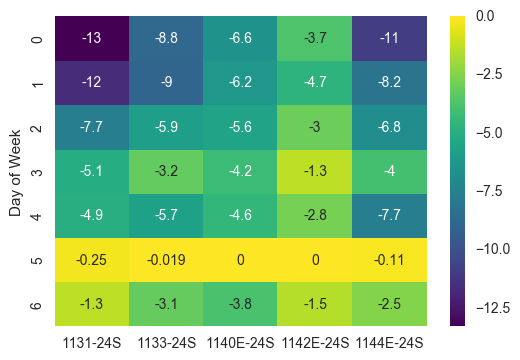

In [15]:
sns.heatmap(sales.drop('Month',axis=1).groupby('Day of Week').mean(),annot=True,cmap='viridis')

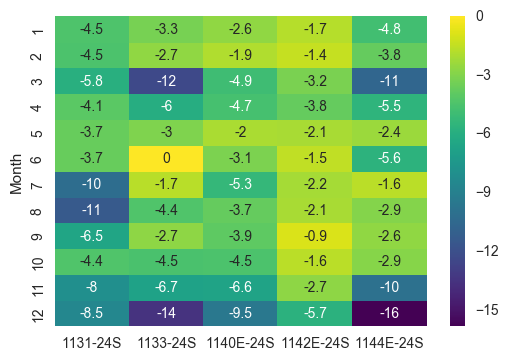

In [16]:
sns.heatmap(sales.drop('Day of Week',axis=1).groupby('Month').mean(),annot=True,cmap='viridis')

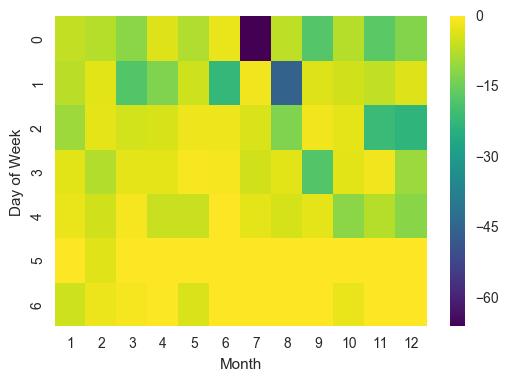

In [17]:
dftemp = sales.groupby(['Day of Week','Month']).mean()
df1131 = dftemp['1131-24S'].unstack(level=-1)
sns.heatmap(df1131,cmap='viridis')

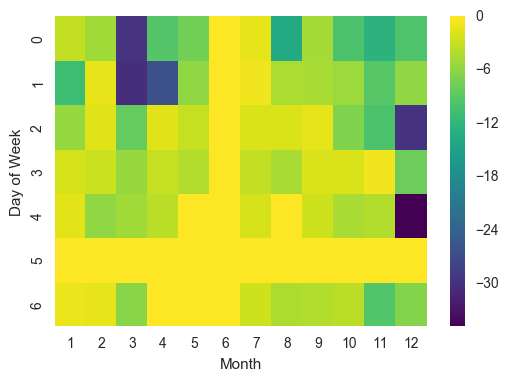

In [18]:
dftemp = sales.groupby(['Day of Week','Month']).mean()
df1133 = dftemp['1133-24S'].unstack(level=-1)
sns.heatmap(df1133,cmap='viridis')

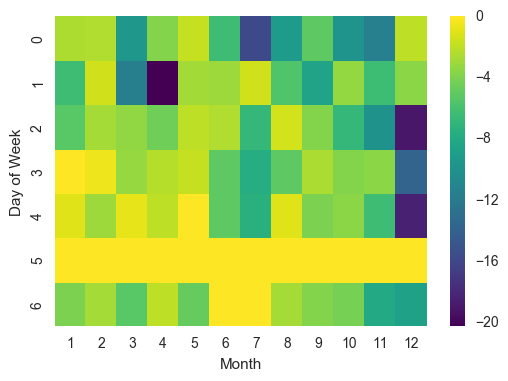

In [19]:
dftemp = sales.groupby(['Day of Week','Month']).mean()
df1140 = dftemp['1140E-24S'].unstack(level=-1)
sns.heatmap(df1140,cmap='viridis')

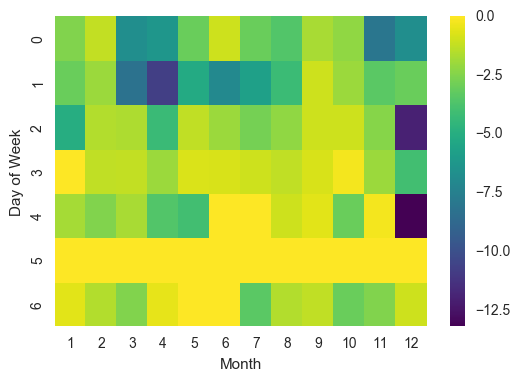

In [20]:
dftemp = sales.groupby(['Day of Week','Month']).mean()
df1142 = dftemp['1142E-24S'].unstack(level=-1)
sns.heatmap(df1142,cmap='viridis')

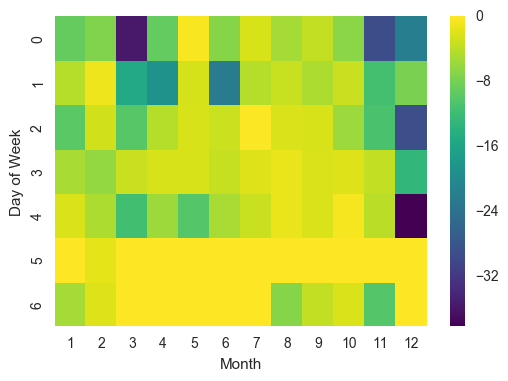

In [21]:
dftemp = sales.groupby(['Day of Week','Month']).mean()
df1144 = dftemp['1144E-24S'].unstack(level=-1)
sns.heatmap(df1144,cmap='viridis')

## Item 33, 40, 42 and 44 Prediction

In [22]:
# Busy season

def busySeason(mn):
    if mn == 3 or mn == 4 or mn == 11 or mn == 12:
        return 1
    else:
        return 0

sales['Busy Season'] = sales['Month'].apply(lambda x: busySeason(x))


# Day of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
sales['Day of Week'] = sales['Day of Week'].map(dmap)

dummy = pd.get_dummies(sales['Day of Week'],drop_first=True)


# Outlier mark
critical = (sales.describe().iloc[1]-3*sales.describe().iloc[2])[:5]

def outlier31(sales):
    if sales < critical[0]:
        return 1
    else:
        return 0

def outlier33(sales):
    if sales < critical[1]:
        return 1
    else:
        return 0

def outlier40(sales):
    if sales < critical[2]:
        return 1
    else:
        return 0

def outlier42(sales):
    if sales < critical[3]:
        return 1
    else:
        return 0
    
def outlier44(sales):
    if sales < critical[4]:
        return 1
    else:
        return 0

sales['outlier31'] = sales['1131-24S'].apply(outlier31)
sales['outlier33'] = sales['1133-24S'].apply(outlier33)
sales['outlier40'] = sales['1140E-24S'].apply(outlier40)
sales['outlier42'] = sales['1142E-24S'].apply(outlier42)
sales['outlier44'] = sales['1144E-24S'].apply(outlier44)
    
salesToTrain = pd.concat([sales,dummy],axis=1)
salesToTrain.drop(['Day of Week','Month'],axis=1,inplace=True)

In [23]:
salesToTrain.head()

,index,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S,Busy Season,outlier31,outlier33,outlier40,outlier42,outlier44,Mon,Sat,Sun,Thu,Tue,Wed
0,2016-01-01,-4.0,0.0,-5.0,-4.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016-01-03,-4.0,0.0,0.0,0.0,-7.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
3,2016-01-04,-2.0,0.0,-5.0,0.0,-13.0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,-1.0,-4.0,0.0,-6.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
# Linear regression
item = ['1131-24S','1133-24S','1140E-24S','1142E-24S','1144E-24S']
out = ['outlier31','outlier33','outlier40','outlier42','outlier44']
intercept = []
coef = []
result = []

from sklearn.linear_model import LinearRegression

for i in range(1,5):
    lm = LinearRegression()
    
    df = salesToTrain[salesToTrain[out[i]] == 0]

    X = df[['Busy Season','Mon','Tue','Wed','Thu','Sat','Sun']]
    y = df[item[i]]

    lm.fit(X,y)
    intercept.append(lm.intercept_)
    coef.append(lm.coef_)
    result.append(pd.DataFrame(lm.coef_,X.columns,columns=[item[i]]))

In [49]:
stat = pd.concat([result[i] for i in range(4)],axis=1)
stat.loc['intercept'] = [i for i in intercept]

In [50]:
stat

,1133-24S,1140E-24S,1142E-24S,1144E-24S
Busy Season,-2.355683,-0.655187,-1.176222,-3.599120
Mon,-4.621020,-2.266844,-2.176466,-4.242728
Tue,-1.889659,-1.426844,-1.746473,0.191680
Wed,-1.136483,-0.486844,-0.611615,0.521237
Thu,-0.416237,-0.046844,0.291850,0.934598
Sat,2.741817,3.066013,1.591861,4.778654
Sun,-0.449148,-0.762600,0.054303,2.315402
intercept,-1.960642,-2.843496,-1.192389,-3.669518


In [57]:
notBusySeasonStat = pd.DataFrame(columns=stat.columns)
notBusySeasonStat.loc['Mon'] = stat.loc['Mon']+stat.loc['intercept']
notBusySeasonStat.loc['Tue'] = stat.loc['Tue']+stat.loc['intercept']
notBusySeasonStat.loc['Wed'] = stat.loc['Wed']+stat.loc['intercept']
notBusySeasonStat.loc['Thu'] = stat.loc['Thu']+stat.loc['intercept']
notBusySeasonStat.loc['Fri'] = stat.loc['intercept']
notBusySeasonStat.loc['Sat'] = stat.loc['Sat']+stat.loc['intercept']
notBusySeasonStat.loc['Sun'] = stat.loc['Sun']+stat.loc['intercept']

In [63]:
notBusySeasonStat

,1133-24S,1140E-24S,1142E-24S,1144E-24S
Mon,-6.581662,-5.110340,-3.368855,-7.912246
Tue,-3.850301,-4.270340,-2.938862,-3.477838
Wed,-3.097125,-3.330340,-1.804004,-3.148282
Thu,-2.376879,-2.890340,-0.900539,-2.734920
Fri,-1.960642,-2.843496,-1.192389,-3.669518
Sat,0.781175,0.222516,0.399472,1.109135
Sun,-2.409790,-3.606096,-1.138086,-1.354117


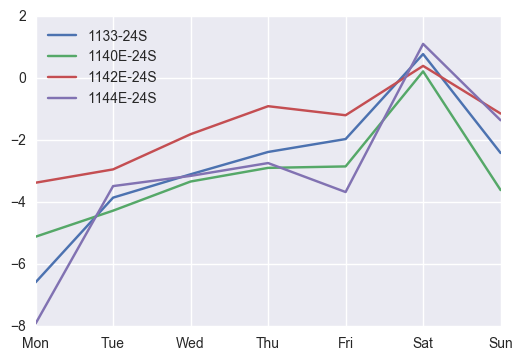

In [64]:
notBusySeasonStat.plot()

In [61]:
busySeasonStat = pd.DataFrame(columns=stat.columns)
busySeasonStat.loc['Mon'] = stat.loc['Mon']+stat.loc['intercept']+stat.loc['Busy Season']
busySeasonStat.loc['Tue'] = stat.loc['Tue']+stat.loc['intercept']+stat.loc['Busy Season']
busySeasonStat.loc['Wed'] = stat.loc['Wed']+stat.loc['intercept']+stat.loc['Busy Season']
busySeasonStat.loc['Thu'] = stat.loc['Thu']+stat.loc['intercept']+stat.loc['Busy Season']
busySeasonStat.loc['Fri'] = stat.loc['intercept']+stat.loc['Busy Season']
busySeasonStat.loc['Sat'] = stat.loc['Sat']+stat.loc['intercept']+stat.loc['Busy Season']
busySeasonStat.loc['Sun'] = stat.loc['Sun']+stat.loc['intercept']+stat.loc['Busy Season']

In [62]:
busySeasonStat

,1133-24S,1140E-24S,1142E-24S,1144E-24S
Mon,-8.937345,-5.765527,-4.545077,-11.511367
Tue,-6.205984,-4.925527,-4.115084,-7.076959
Wed,-5.452808,-3.985527,-2.980226,-6.747402
Thu,-4.732562,-3.545527,-2.076760,-6.334040
Fri,-4.316325,-3.498684,-2.368611,-7.268639
Sat,-1.574507,-0.432671,-0.776750,-2.489985
Sun,-4.765473,-4.261284,-2.314307,-4.953237


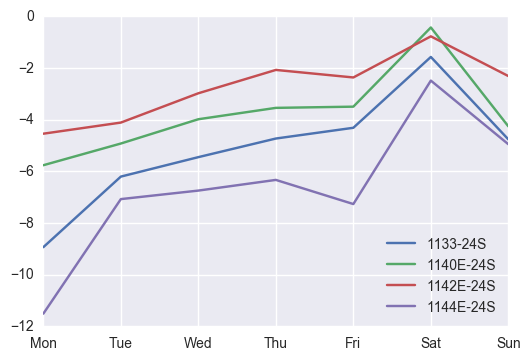

In [65]:
busySeasonStat.plot()

In [22]:
# Best sales

sales.set_index('index',inplace=True)
sales.drop('Month',axis=1,inplace=True)
sales.drop('Day of Week',axis=1,inplace=True)
sales[sales<=-50].dropna(thresh=1)

,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S
index,,,,,
2016-03-15,-53.0,-77.0,NaN,NaN,NaN
2016-03-22,NaN,-68.0,NaN,NaN,NaN
2016-03-28,NaN,-89.0,NaN,NaN,-69.0
2016-04-12,NaN,-98.0,-63.0,NaN,-75.0
2016-06-28,-51.0,NaN,NaN,NaN,-72.0
2016-07-11,-126.0,NaN,NaN,NaN,NaN
2016-07-25,-122.0,NaN,NaN,NaN,NaN
2016-08-09,-134.0,NaN,NaN,NaN,NaN
2016-08-23,-87.0,NaN,NaN,NaN,NaN


In [23]:
sales.sort(columns='1131-24S')['1131-24S'].head(10)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


index
2016-08-09   -134.0
2016-07-11   -126.0
2016-07-25   -122.0
2016-08-23    -87.0
2016-09-15    -82.0
2016-12-21    -69.0
2016-09-26    -67.0
2016-08-24    -55.0
2016-11-09    -55.0
2016-03-15    -53.0
Name: 1131-24S, dtype: float64

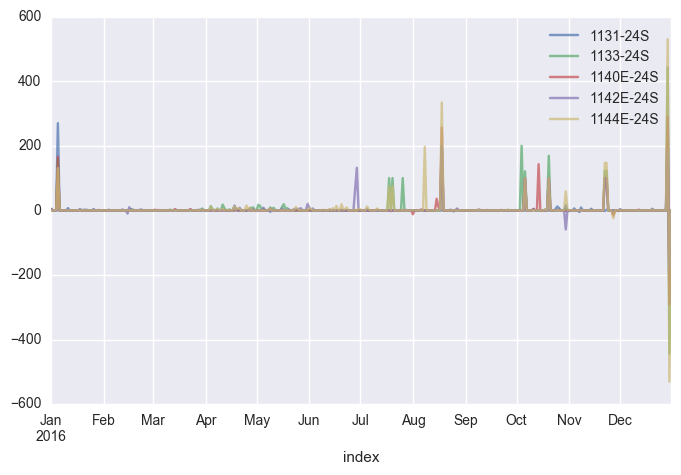

In [23]:
# When are the items purchased

diff = inv.diff().fillna(0)-sales
diff.plot(figsize=(8,5),alpha=0.7)

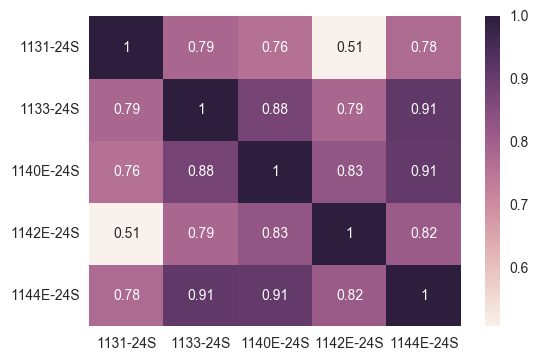

In [24]:
sns.heatmap(diff.corr(),annot=True)

In [25]:
diff[diff<0].dropna(thresh=1)

,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S
index,,,,,
2016-01-12,-1.0,NaN,NaN,NaN,NaN
2016-01-19,NaN,NaN,-1.0,NaN,NaN
2016-02-15,NaN,NaN,NaN,-10.0,NaN
2016-02-29,-1.0,NaN,NaN,NaN,NaN
2016-03-24,NaN,NaN,-1.0,NaN,NaN
2016-03-25,NaN,NaN,-1.0,NaN,NaN
2016-03-29,-1.0,NaN,NaN,NaN,NaN
2016-05-09,-4.0,NaN,NaN,NaN,NaN
2016-06-10,-1.0,NaN,NaN,NaN,NaN


In [26]:
diff[diff>=100].dropna(thresh=1)

,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S
index,,,,,
2016-01-05,270.0,160.0,166.0,NaN,131.0
2016-06-29,NaN,NaN,NaN,132.0,NaN
2016-07-18,NaN,100.0,NaN,NaN,NaN
2016-07-20,NaN,100.0,NaN,NaN,NaN
2016-07-26,NaN,100.0,NaN,NaN,NaN
2016-08-08,NaN,NaN,NaN,NaN,197.0
2016-08-18,NaN,200.0,256.0,200.0,334.0
2016-10-04,NaN,200.0,NaN,NaN,NaN
2016-10-06,NaN,121.0,100.0,100.0,100.0


In [27]:
sales.sum()

1131-24S    -2301.0
1133-24S    -1865.0
1140E-24S   -1614.0
1142E-24S    -885.0
1144E-24S   -2098.0
dtype: float64

In [28]:
diff.sum()

1131-24S      369.0
1133-24S     1592.0
1140E-24S    1033.0
1142E-24S     890.0
1144E-24S    1547.0
dtype: float64

In [29]:
inv.diff().sum()

1131-24S    -1932.0
1133-24S     -273.0
1140E-24S    -581.0
1142E-24S       5.0
1144E-24S    -551.0
dtype: float64

In [30]:
diff[(diff<20)&(diff>0)].dropna(thresh=1)

,1131-24S,1133-24S,1140E-24S,1142E-24S,1144E-24S
index,,,,,
2016-01-01,4.0,NaN,5.0,4.0,NaN
2016-01-11,7.0,NaN,NaN,NaN,NaN
2016-01-18,4.0,1.0,1.0,NaN,NaN
2016-01-20,NaN,2.0,NaN,NaN,NaN
2016-01-21,NaN,NaN,NaN,2.0,NaN
2016-01-22,NaN,NaN,NaN,2.0,NaN
2016-01-26,4.0,NaN,NaN,NaN,NaN
2016-01-29,NaN,NaN,1.0,1.0,NaN
2016-02-04,2.0,NaN,NaN,NaN,NaN
